In [1]:
!ls

Churn.csv  sample_data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

#**Part 1: Data Understanding**

In [3]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# In our dataset we have 3 columns that have no affect on our dataset, so we would drop these columns ' RowNumber, ID, Surname'

df = df.drop(columns=['CustomerId', 'Surname', 'RowNumber'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape ##We are dealing with 1000 rows and 11 columns

(10000, 11)

In [ ]:
#Finding the unique entries on our columns so we get a good range of our dataset
unique_counts = df.nunique()
print("Unique Entries in our Dataset:\n", unique_counts)

Unique Entries in our Dataset:
 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [ ]:
#Checking for missing values
missing_values=pd.isnull(df).sum()
print("Number of missing values in the dataset:\n", missing_values)

Number of missing values in the dataset:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
##Checking for invalid entries
invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Number of invalid entries in the dataset:\n", invalid_entries)

Number of invalid entries in the dataset:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
##Checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates in the dataset:", duplicates)

Number of duplicates in the dataset: 0


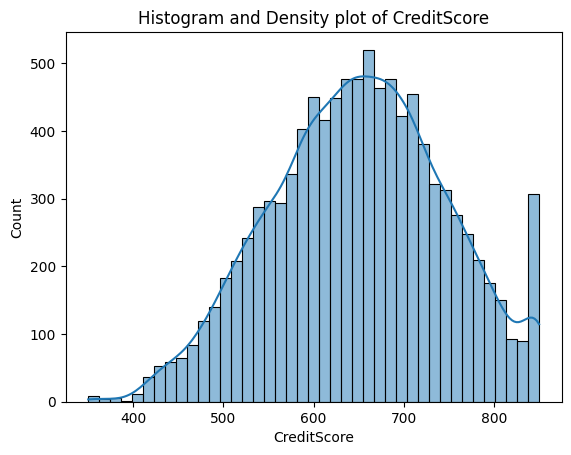

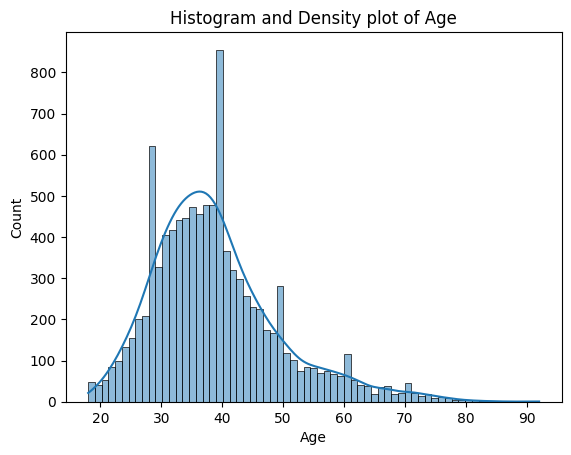

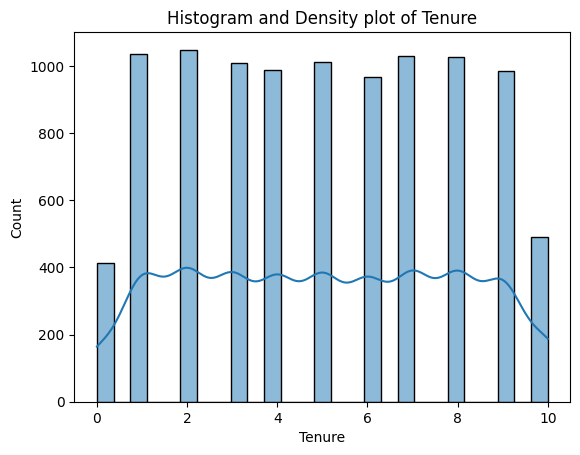

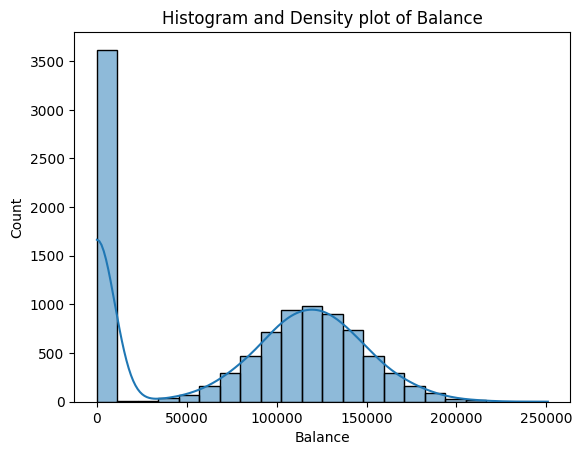

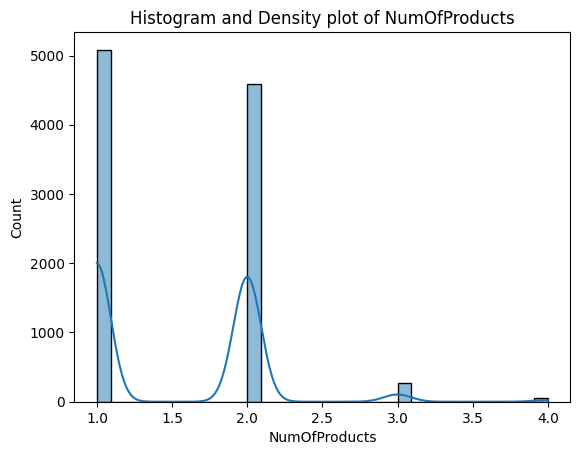

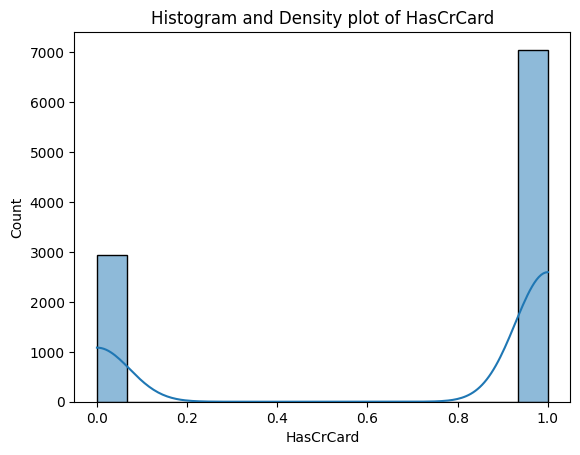

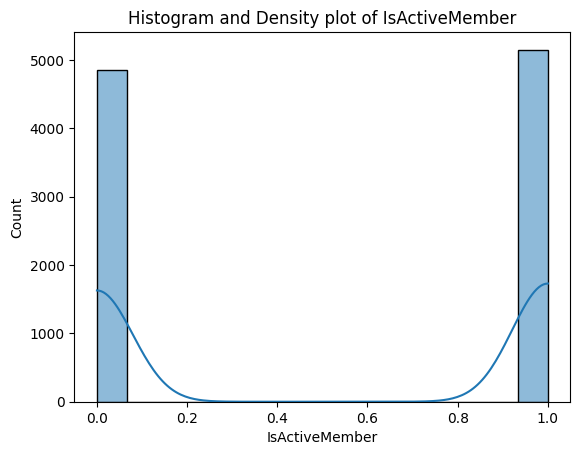

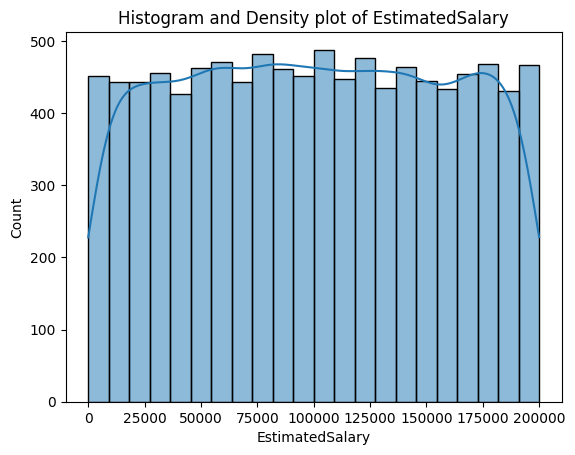

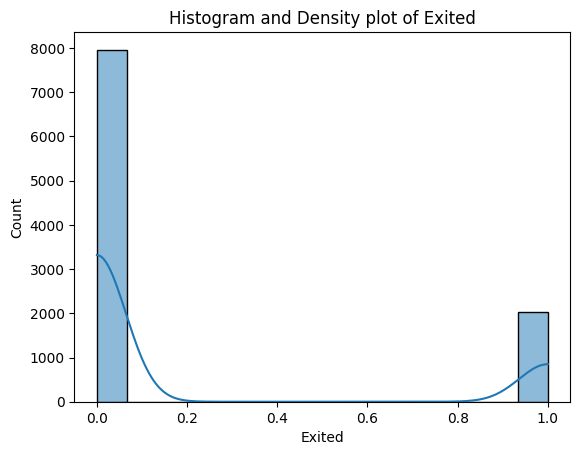

In [ ]:
##Checking the distribution
for col in df. select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Density plot of {col}")
  plt.show()

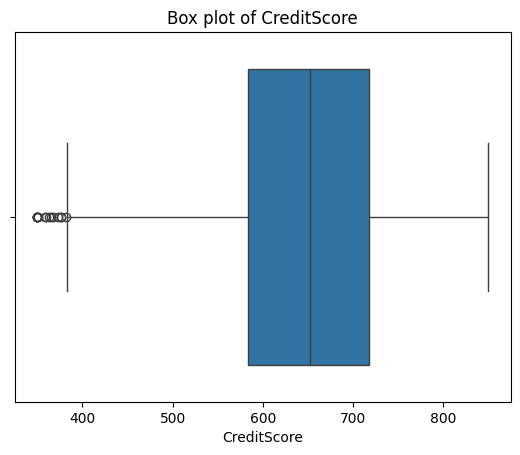

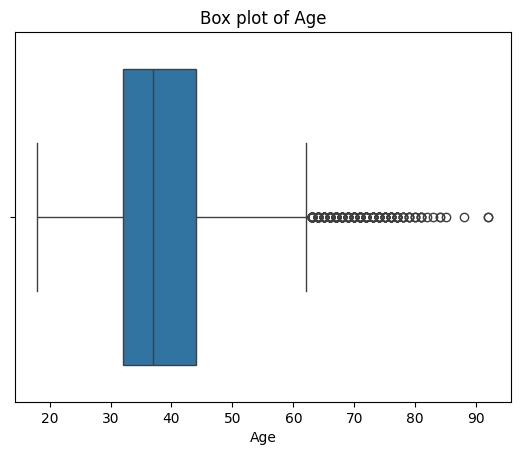

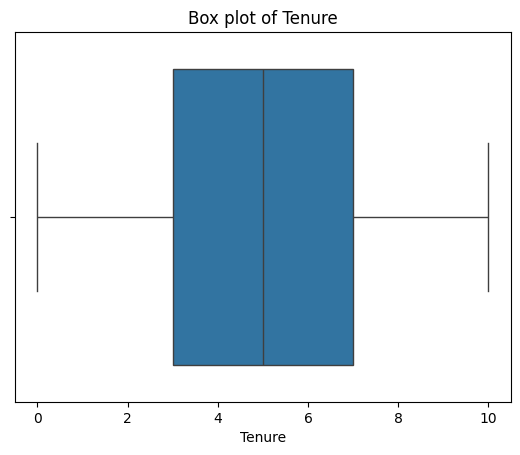

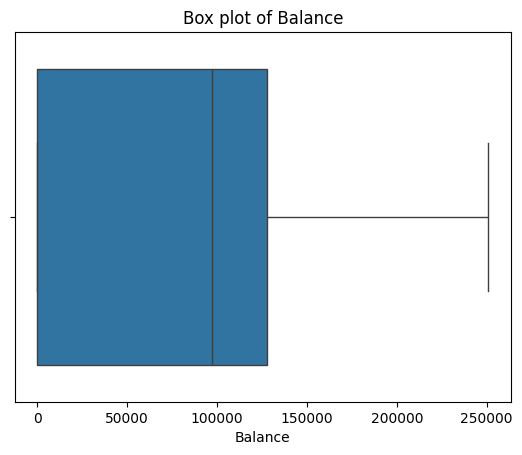

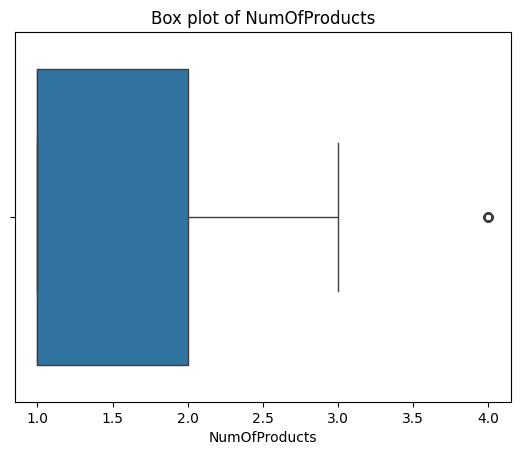

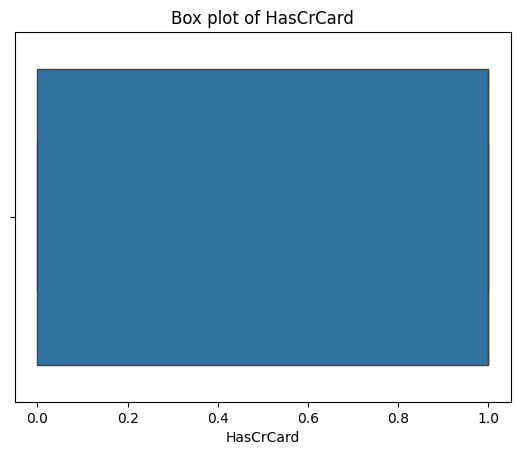

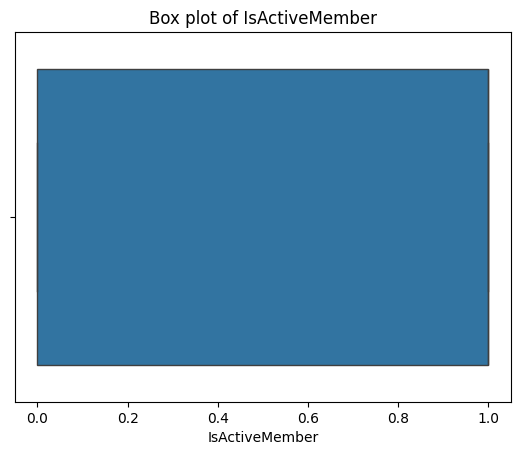

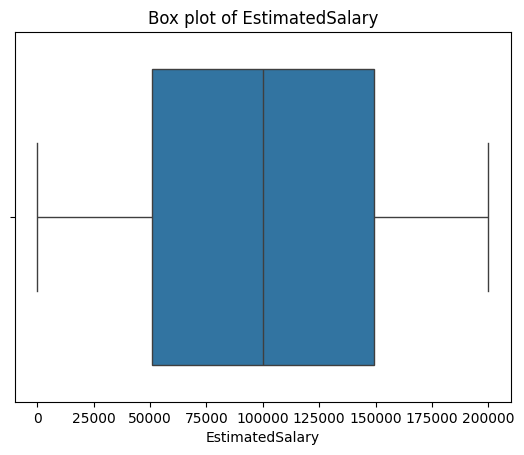

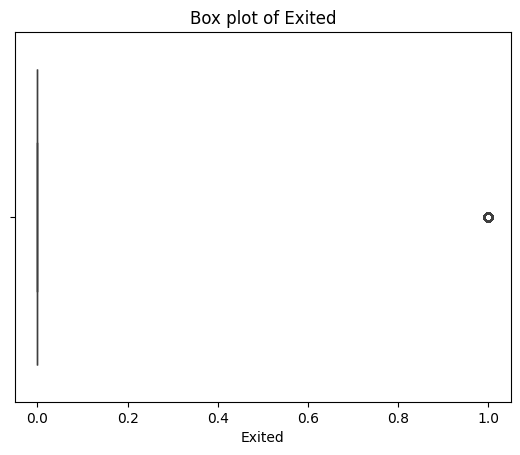

In [ ]:
## Cheking for any potential outliers
for col in df. select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Box plot of {col}")
  plt.show()

<ipython-input-127-68b8820d0582>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


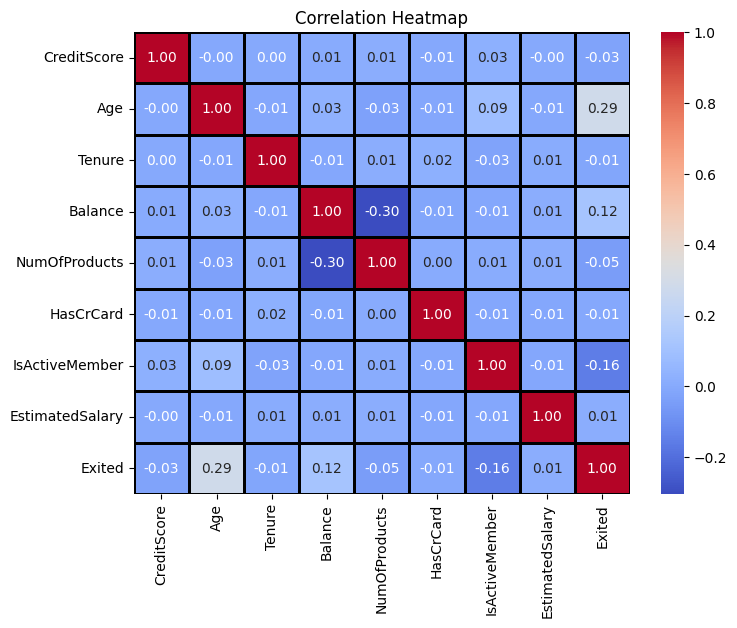

In [ ]:
##Correlation to understand the relationship between the variables
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')

plt.title('Correlation Heatmap')

plt.show()


**Takeaways from the correlation heatmap:**

* **Gender:** There is a weak negative correlation between Gender and Churn. This means that females are slightly more likely to churn than males.
* **Age:** There is a weak positive correlation between Age and Churn. This means that older customers are slightly more likely to churn than younger customers.
* **Tenure:** There is a strong negative correlation between Tenure and Churn. This means that customers who have been with the company for a longer period of time are less likely to churn.
* **Balance:** There is a weak positive correlation between Balance and Churn. This means that customers with higher balances are slightly more likely to churn.
* **NumOfProducts:** There is a weak negative correlation between NumOfProducts and Churn. This means that customers who have more products with the company are less likely to churn.
* **HasCrCard:** There is a weak negative correlation between HasCrCard and Churn. This means that customers who have a credit card with the company are less likely to churn.
* **IsActiveMember:** There is a strong negative correlation between IsActiveMember and Churn. This means that customers who are active members of the company are less likely to churn.

**Overall, the correlation heatmap shows that there are a number of factors that are associated with churn. These factors include:**

* **Tenure:** Customers who have been with the company for a longer period of time are less likely to churn.
* **NumOfProducts:** Customers who have more products with the company are less likely to churn.
* **HasCrCard:** Customers who have a credit card with the company are less likely to churn.
* **IsActiveMember:** Customers who are active members of the company are less likely to churn.

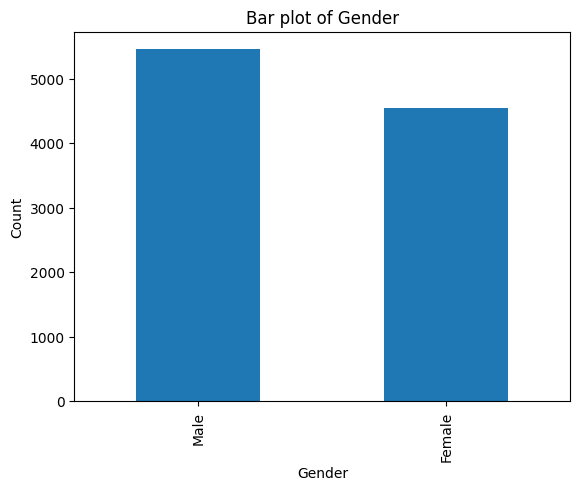

In [ ]:
# Visualization with bar graph to display the ratio of Males to Females

df['Gender'].value_counts().plot(kind='bar')
plt.title('Bar plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

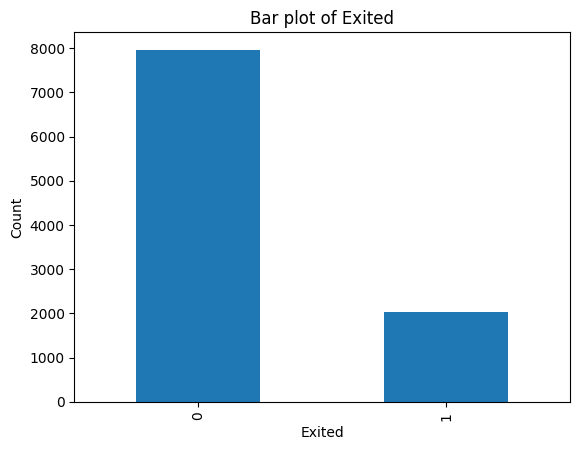

In [4]:
df['Exited'].value_counts().plot(kind='bar')
plt.title('Bar plot of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [5]:

gender_counts = df['Exited'].value_counts()
total_count = len(df)
percentage_male = (gender_counts[0] / total_count) * 100
percentage_female = (gender_counts[1] / total_count) * 100
print(f"Percentage of Stay: {percentage_male:.2f}%")
print(f"Percentage of Exited: {percentage_female:.2f}%")

Percentage of Stay: 79.63%
Percentage of Exited: 20.37%


In [ ]:
# Percencentage of male and female in the 'Gender' column.

gender_counts = df['Gender'].value_counts()
total_count = len(df)
percentage_male = (gender_counts['Male'] / total_count) * 100
percentage_female = (gender_counts['Female'] / total_count) * 100
print(f"Percentage of Male: {percentage_male:.2f}%")
print(f"Percentage of Female: {percentage_female:.2f}%")

Percentage of Male: 54.57%
Percentage of Female: 45.43%


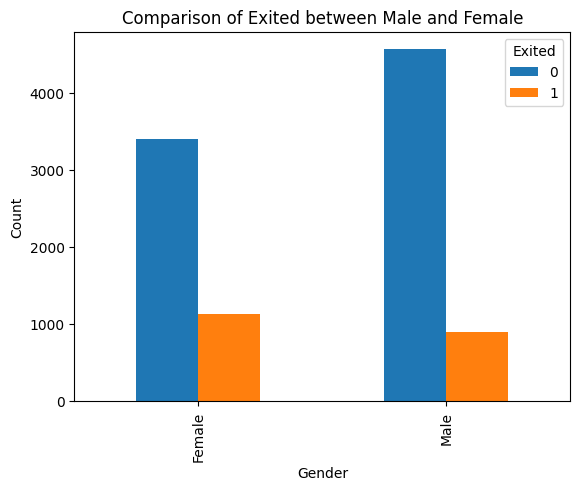

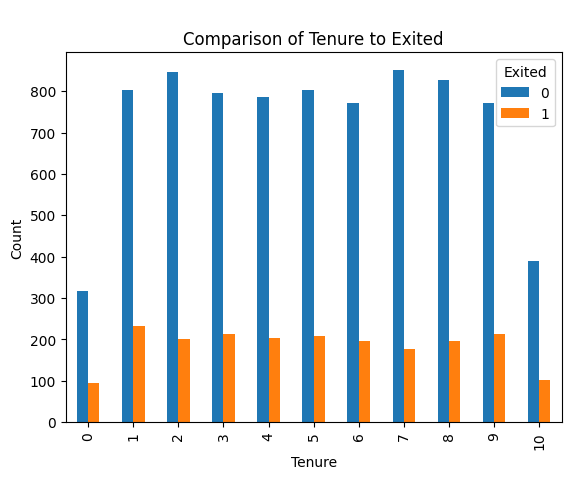

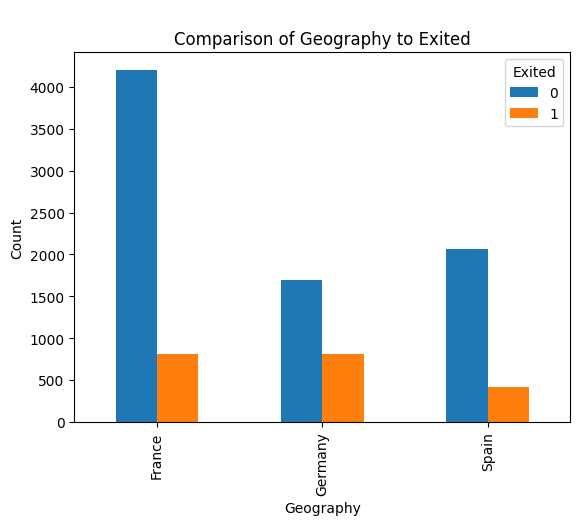

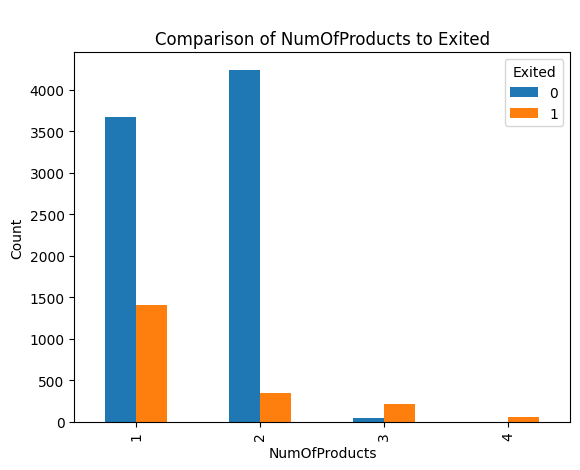

In [ ]:
# Visualization of certain variables to target variables that have possible effect

#Gender to Exited
grouped_data = df.groupby(['Gender', 'Exited'])['Exited'].count()

grouped_data.unstack().plot(kind='bar')
plt.title('Comparison of Exited between Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Tenure to Exited
grouped_data = df.groupby(['Tenure', 'Exited'])['Exited'].count()

grouped_data.unstack().plot(kind='bar')
plt.title('\nComparison of Tenure to Exited')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

#Geography to Exited
grouped_data = df.groupby(['Geography', 'Exited'])['Exited'].count()

grouped_data.unstack().plot(kind='bar')
plt.title('\nComparison of Geography to Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

#NumOfProducts to Exited
grouped_data = df.groupby(['NumOfProducts', 'Exited'])['Exited'].count()

grouped_data.unstack().plot(kind='bar')
plt.title('\nComparison of NumOfProducts to Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

In [ ]:
df.kurtosis()
## The variables with negative Kurtosis means that the distribution is flatter
##than a normal curve with the same mean and standard deviation
## The positive represents heavier tails and a more peaked distribution

<ipython-input-131-2255c6abdc93>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

In [ ]:
df.skew() ## Most of the variables are left skewed

<ipython-input-132-d6bfe9b08a73>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew() ## Most of the variables are left skewed


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

#**Part 2: Data Preprocessing**

In [ ]:
# For income we do know that there is a large number of entries of '0' for 'Balance' when visualizing the dataset
# However, the distribution right of the '0', is normally distrubted, in that possible mean imputation will fix the issue with the large amount of '0' entries on the left that will potentially
# Improve our model in terms of accuracy and prediciton.
mean_balance = df.loc[df['Balance'] != 0, 'Balance'].mean()
df.loc[df['Balance'] == 0, 'Balance'] = mean_balance


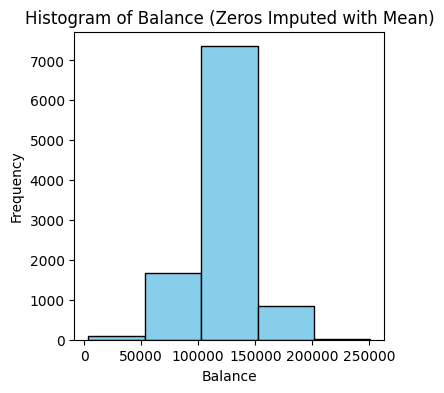

In [ ]:
plt.figure(figsize=(4, 4))
plt.hist(df['Balance'], bins=5, color='skyblue',edgecolor='black')

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance (Zeros Imputed with Mean)')
plt.show()

In [ ]:
## Handling the ouliers using the median technique. We used this technique because it is not influenced by the extreme values.
# Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
median_to_impute = df[((df['Age'] >= (Q1-1.5*IQR)) | (df['Age'] <= (Q3+1.5*IQR)))]['Age'].median()
df.loc[((df['Age'] < (Q1-1.5*IQR)) | (df['Age'] >(Q3+1.5*IQR))), 'Age'] = median_to_impute

## Credit scosre
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3-Q1
median_to_impute = df[((df['CreditScore'] >= (Q1-1.5*IQR)) | (df['CreditScore'] <= (Q3+1.5*IQR)))]['CreditScore'].median()
df.loc[((df['CreditScore'] < (Q1-1.5*IQR)) | (df['CreditScore'] >(Q3+1.5*IQR))), 'CreditScore'] = median_to_impute

## Number of products
Q1 = df['NumOfProducts'].quantile(0.25)
Q3 = df['NumOfProducts'].quantile(0.75)
IQR = Q3-Q1
median_to_impute = df[((df['NumOfProducts'] >= (Q1-1.5*IQR)) | (df['NumOfProducts'] <= (Q3+1.5*IQR)))]['NumOfProducts'].median()
df.loc[((df['NumOfProducts'] < (Q1-1.5*IQR)) | (df['NumOfProducts'] >(Q3+1.5*IQR))), 'NumOfProducts'] = median_to_impute

## Number of products
Q1 = df['Exited'].quantile(0.25)
Q3 = df['Exited'].quantile(0.75)
IQR = Q3-Q1
median_to_impute = df[((df['Exited'] >= (Q1-1.5*IQR)) | (df['Exited'] <= (Q3+1.5*IQR)))]['Exited'].median()
df.loc[((df['Exited'] < (Q1-1.5*IQR)) | (df['Exited'] >(Q3+1.5*IQR))), 'Exited'] = median_to_impute

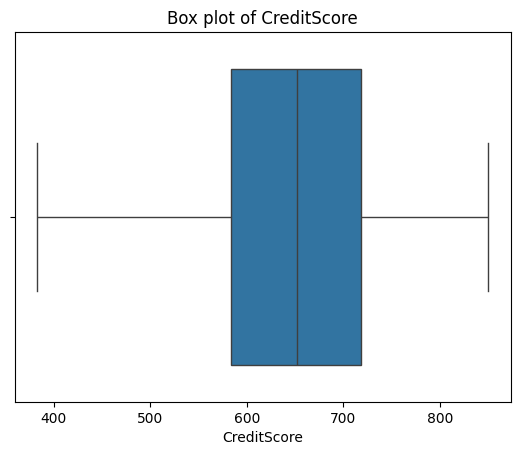

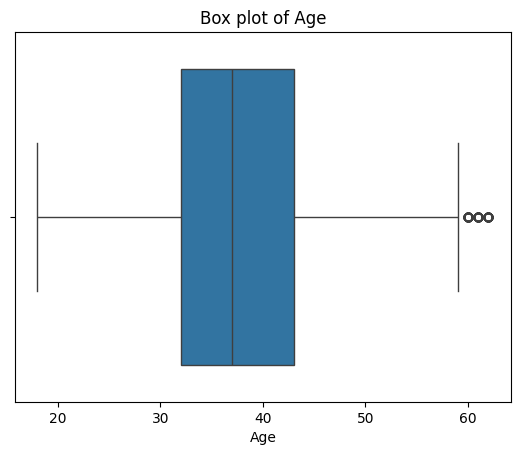

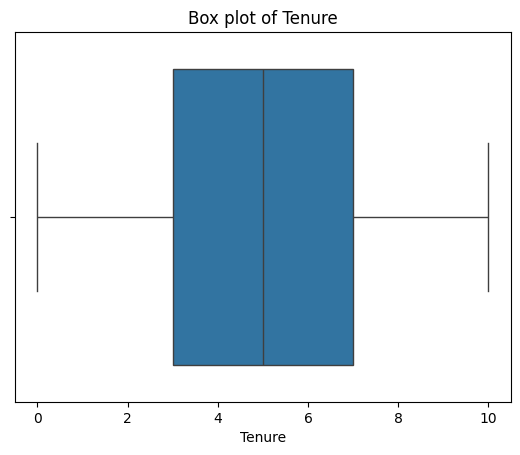

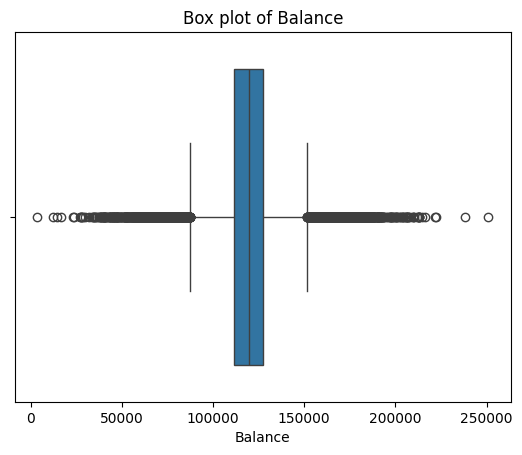

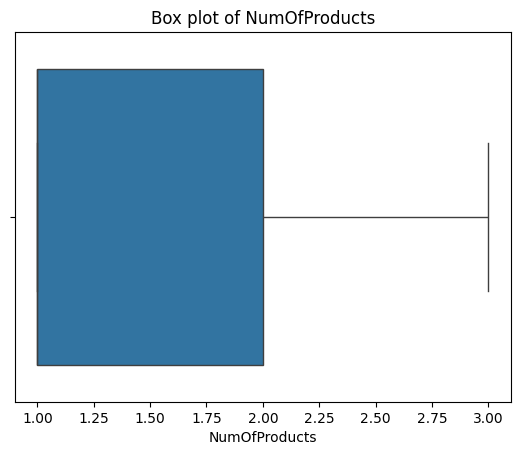

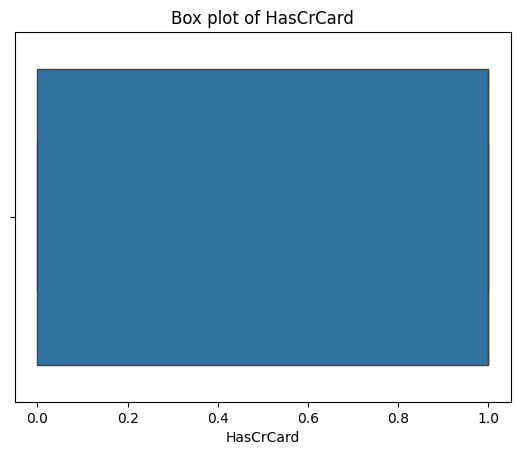

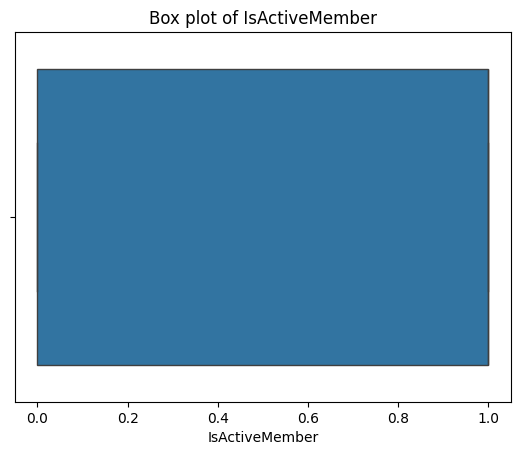

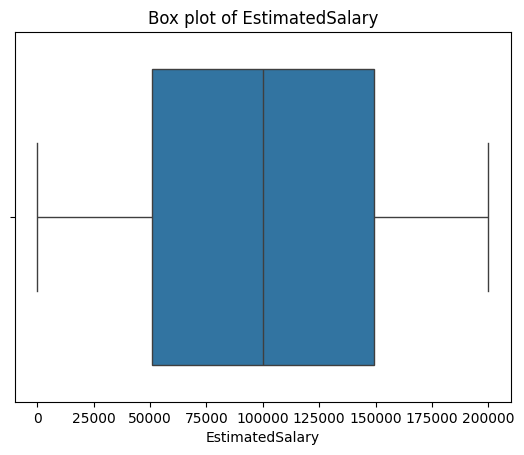

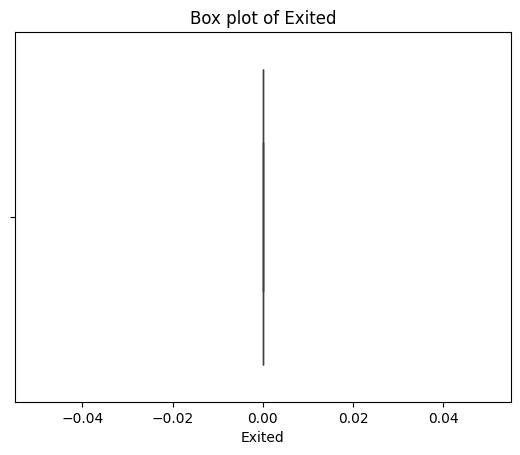

In [ ]:
for col in df. select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Box plot of {col}")
  plt.show()

##**Transformation**

####These plots now shows normal distribution with the mean zero. With the normal distribution is easy to understand the dataset.

##**Feature engineering**

In [ ]:
df['NumOfProducts_Balance'] = df['NumOfProducts'] / df['Balance']

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Exited,NumOfProducts_Balance,IsActiveMember_Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,119827.493793,1,1,1,101348.88,0,inf,0.000008,inf,1,0,0
1,608,0,41,1,83807.860000,1,0,1,112542.58,0,inf,0.000012,inf,0,0,1
2,502,0,42,8,159660.800000,3,1,0,113931.57,0,inf,0.000019,NaN,1,0,0
3,699,0,39,1,119827.493793,2,0,0,93826.63,0,inf,0.000017,NaN,1,0,0
4,850,0,43,2,125510.820000,1,1,1,79084.10,0,inf,0.000008,inf,0,0,1


In [ ]:
##Encoding the categorical value gender so that the model can learn from it.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df['Gender'].head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [ ]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Exited,NumOfProducts_Balance,IsActiveMember_Exited
0,619,France,0,42,2,119827.493793,1,1,1,101348.88,0,inf,0.000008,inf
1,608,Spain,0,41,1,83807.860000,1,0,1,112542.58,0,inf,0.000012,inf
2,502,France,0,42,8,159660.800000,3,1,0,113931.57,0,inf,0.000019,NaN
3,699,France,0,39,1,119827.493793,2,0,0,93826.63,0,inf,0.000017,NaN
4,850,Spain,0,43,2,125510.820000,1,1,1,79084.10,0,inf,0.000008,inf


##### One-hot encoding is the best method to encode the variable Geography because it creates new binary features for each category in the variable. This allows the model to learn the relationship between each category and the target variable independently.


In [ ]:
df = pd.get_dummies(df, columns=['Geography'])
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Exited,NumOfProducts_Balance,IsActiveMember_Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,119827.493793,1,1,1,101348.88,0,inf,0.000008,inf,1,0,0
1,608,0,41,1,83807.860000,1,0,1,112542.58,0,inf,0.000012,inf,0,0,1
2,502,0,42,8,159660.800000,3,1,0,113931.57,0,inf,0.000019,NaN,1,0,0
3,699,0,39,1,119827.493793,2,0,0,93826.63,0,inf,0.000017,NaN,1,0,0
4,850,0,43,2,125510.820000,1,1,1,79084.10,0,inf,0.000008,inf,0,0,1


#**Part 3: Model Development and Evaluation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'NumOfProducts_Balance',
         'Geography_France', 'Geography_Germany', 'Geography_Spain']]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[2000]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'NumOfProducts_Balance',
         'Geography_France', 'Geography_Germany', 'Geography_Spain']]

y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)


Accuracy: 1.0
Confusion Matrix:
 [[2000]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

